In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import MaaSSim

In [2]:
#!pip install MaaSSim
import MaaSSim.utils
import logging
from dotmap import DotMap
import MaaSSim.simulators
from MaaSSim.data_structures import structures as inData
from MaaSSim.acceptance import ResultS

In [3]:
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt          
import numpy as np
import seaborn as sns

In [4]:
# Do not forget to set the radius for centeral nodes calculation
# The minimum trip distance is considered 1000m and this can be modified through utils.py: generate_demand function. 
# long attribute should be calculated according to the size of city
# Platform fare is 2$ per km
# Passengers' and drivers' positions are fixed.

params = MaaSSim.utils.get_config('glance.json')
params.use_fixed_postions = True
params.times.patience = 600 #in second
params.dist_threshold = 10000 #in meter
params.vehicle_fixed_positions= True  #this should be fixed
params.city = "Delft, Netherlands"
params.paths.G = "../../data/graphs/Delft.graphml"
params.paths.skim = "../../data/graphs/Delft.csv"
params.paths.ride_skim = "../../data/graphs/Delft_ride.csv"
params.nP = 500
params.nV = 20
params.simTime = 5

In [5]:
sim= MaaSSim.simulators.simulate(params=params, logger_level=logging.WARNING)

22-11-21 11:06:35-WARNING-Setting up 5h simulation at 2021-11-22 08:38:26 for 20 vehicles and 500 passengers in Delft, Netherlands
22-11-21 11:06:44-WARNING-simulation time 8.7 s
22-11-21 11:06:45-WARNING-assertion tests for simulation results - passed


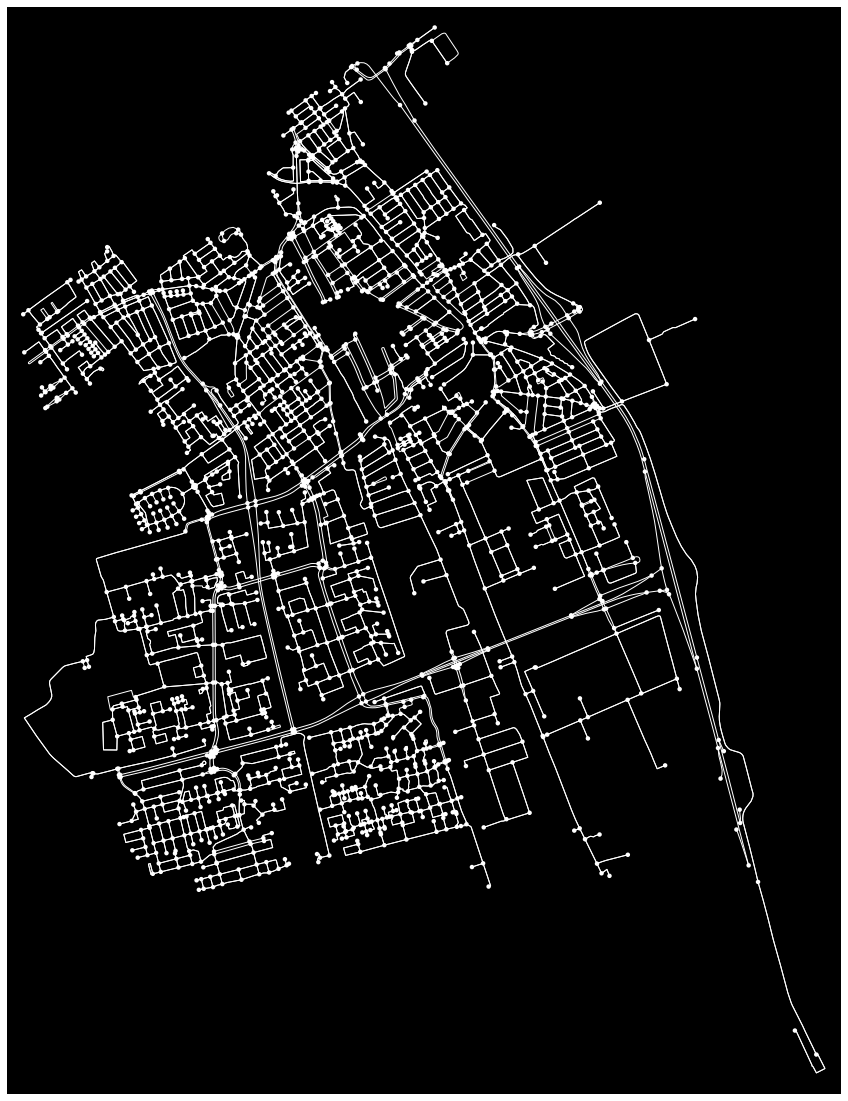

In [131]:
#No need to run
G = sim.inData.G
fig, ax = ox.plot_graph(G, figsize=(20, 20), show=False, close=False, node_size=20, bgcolor='black', edge_color='w')

Number of centeral nodes:  173


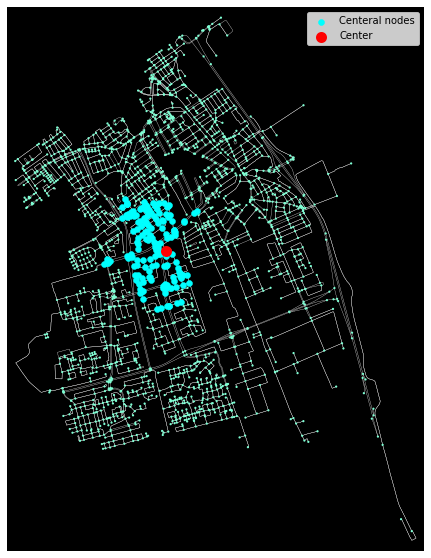

In [7]:
#No need to run
centeral_nodes = sim.inData.stats.central_nodes

l_x=[]
l_y=[]

for i in centeral_nodes:
    l_x.append(sim.inData.G.nodes[i]['x'])
    l_y.append(sim.inData.G.nodes[i]['y'])

print('Number of centeral nodes: ', len(l_x))

fig, ax = ox.plot_graph(sim.inData.G, figsize=(10, 10), node_size=5, edge_linewidth=0.3,
                            show=False, close=False, node_color='aquamarine',
                            edge_color='white', bgcolor='black')

scat = plt.scatter(x=l_x, y=l_y,c='aqua',linewidths=0.5, label='Centeral nodes')
#scat = plt.scatter(x=l_x, y=l_y,c='tab:red',linewidths=1)
scat = plt.scatter(x=sim.inData.G.nodes[sim.inData.stats.center]['x'], 
                   y=sim.inData.G.nodes[sim.inData.stats.center]['y'],c='red',linewidths=5,
                   label='Center')

plt.legend()

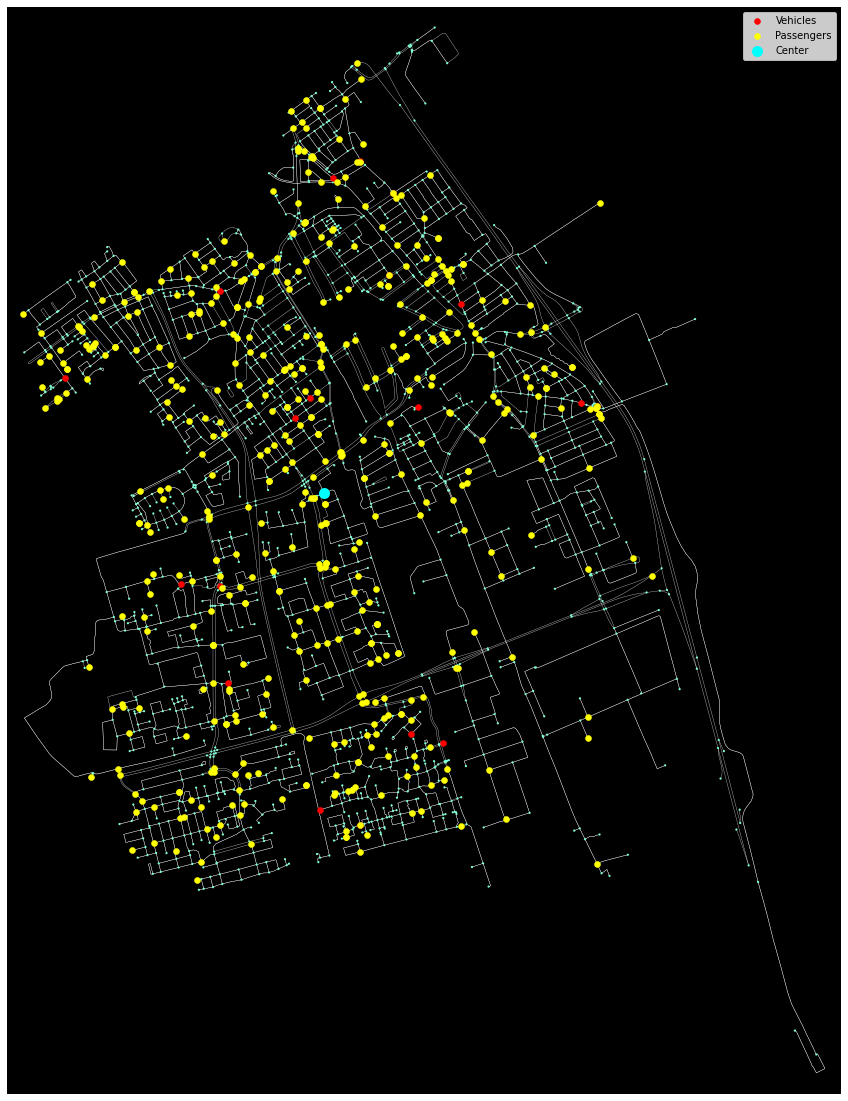

In [6]:
vehicles_position = sim.vehicle_fixed_positions
veh_lx=[]
veh_ly=[]
for i in vehicles_position:
    veh_lx.append(sim.inData.G.nodes[i]['x'])
    veh_ly.append(sim.inData.G.nodes[i]['y'])
    
passengers_position = sim.inData.passengers.pos
pass_lx=[]
pass_ly=[]
for i in passengers_position:
    pass_lx.append(sim.inData.G.nodes[i]['x'])
    pass_ly.append(sim.inData.G.nodes[i]['y'])

fig, ax = ox.plot_graph(sim.inData.G, figsize=(20, 20), node_size=5, edge_linewidth=0.3,
                            show=False, close=False, node_color='aquamarine',
                            edge_color='white', bgcolor='black')

scat = plt.scatter(x=veh_lx, y=veh_ly,c='red',linewidths=0.5, label='Vehicles')
scat = plt.scatter(x=pass_lx, y=pass_ly,c='yellow',linewidths=0.5, label='Passengers')
#scat = plt.scatter(x=l_x, y=l_y,c='tab:red',linewidths=1)
scat = plt.scatter(x=sim.inData.G.nodes[sim.inData.stats.center]['x'], 
                   y=sim.inData.G.nodes[sim.inData.stats.center]['y'],c='aqua',linewidths=5,
                   label='Center')

plt.legend()

In [128]:
r_def= ResultS(sim)

In [139]:
r_def.passengers['waiting_t[sec]'].mean()

20.242

In [133]:
df = r_def.trips
df[df['veh_id']==1]

,veh_id,pax_id,pickup_t[min],pickup_d[km],travel_t_with[min],pax_km,travel_t[min],travel_d[km],veh_waiting_t[sec],revenue $
0,1,0,4.966667,2.98,1.716667,1.03,7.183333,4.31,0,2.06
1,1,23,1.550000,0.93,5.483333,3.29,7.533333,4.52,148,6.58
2,1,42,4.483333,2.69,4.850000,2.91,9.833333,5.90,261,5.82
3,1,58,3.700000,2.22,5.533333,3.32,9.733333,5.84,342,6.64
4,1,81,1.600000,0.96,4.233333,2.54,6.333333,3.80,142,5.08
5,1,90,0.350000,0.21,4.766667,2.86,5.616667,3.37,22,5.72
6,1,103,1.816667,1.09,6.316667,3.79,8.633333,5.18,51,7.58
7,1,125,2.050000,1.23,5.200000,3.12,7.750000,4.65,28,6.24
8,1,150,4.666667,2.80,5.700000,3.42,10.866667,6.52,239,6.84
9,1,174,4.350000,2.61,3.150000,1.89,8.000000,4.80,183,3.78


In [8]:
import numpy as np
import pandas as pd
import math
import random as random
from dotmap import DotMap


def f_decline(veh, **kwargs):
    

    df = pd.DataFrame(veh.myrides)
    ASC = 1.810                                                                                   #ASC
    
    working_shift = sim.params.simTime*3600 - veh.veh['shift_start']                               #Time1_loc
    T1 = int(working_shift/3)
    request_time = df[df['event']=='RECEIVES_REQUEST'].iloc[-1]['t']
    
    if  request_time in range(veh.veh['shift_start'], veh.veh['shift_start']+T1):
        Time1 = 1
    else:
        Time1 = 0
        
    if veh.veh['pos'] in sim.inData.stats.central_nodes:
        loc = 1
    else:
        loc = 0
        
        
    d = veh.offers[0]['request']["origin"]                                                       #pickup_time
    o = veh.veh.pos
    pickup_time = veh.sim.skims.ride[o][d]/60  #minutes
      
    t = df[df['event']=='RECEIVES_REQUEST'].iloc[-1]['t']                                        #waiting_time
    
    if 'ARRIVES_AT_DROPOFF' in df['event'].unique():
        t0 = df[df['event']=='ARRIVES_AT_DROPOFF'].iloc[-1]['t']
    else:
        t0 = df[df['event']=='OPENS_APP'].iloc[-1]['t']
    waiting_time = (t - t0)/60 #minutes 
    
    surge_price = 0                                                                               #surge_price
    
    req = 1                         #req                                                          #req_long_rate_dec
    
    if (veh.offers[0]["request"]["dist"]/sim.params.speeds.ride)/60 > 6.5: #long
        long = 1
    else:
        long = 0
        
    rate = sim.pax[veh.offers[0]['pax_id']].pax.get('rate',5)   #rate
    
    if len(veh.declines.index) == 0:          #dec
        last_declined = 'False'
    else:
        last_declined = veh.declines.loc[len(veh.declines.index)-1]['declined']
        
    if last_declined == 'True':
        dec = 1
    else:
        dec = 0
        
           
    V = ((ASC*1) + (Time1*loc*(-0.303)) + (pickup_time*(-0.050)) + (waiting_time*(-0.017)) + 
        ((req*long*rate*dec)*0.091) + (surge_price*0.101))
    
    
    acc_prob = (math.exp(V))/(1+math.exp(V))

    attr = pd.DataFrame({'pax_id':[veh.offers[0]['pax_id']], 'veh_id':[veh.id], 'Time1':Time1,  
                             'loc':loc, 'Time1_loc':[Time1*loc*(-0.303)], 'pickup_time':[pickup_time*(-0.050)],
                             'waiting_t':[waiting_time], 'surge_price':[surge_price*0.101], 
                             'req_long_rate_dec':[req*long*rate*dec*0.091], 'req':1, 'long':long, 
                             'rate':rate, 'dec':dec, 'P':[acc_prob]})
    sim.acceptance_attributes = pd.concat([sim.acceptance_attributes,attr])

    
    if acc_prob > random.uniform(0, 1):
        return False
    else:
        return True
    


sim.make_and_run(f_driver_decline=f_decline)

22-11-21 11:07:07-WARNING-pax    7  got rejected by vehicle 17               2021-11-22 08:42:51
22-11-21 11:07:07-WARNING-pax    8  got rejected by vehicle 16               2021-11-22 08:43:04
22-11-21 11:07:07-WARNING-pax    8  got rejected by vehicle 17               2021-11-22 08:43:04
22-11-21 11:07:07-WARNING-pax   11  got rejected by vehicle 16               2021-11-22 08:44:11
22-11-21 11:07:07-WARNING-pax   17  got rejected by vehicle 12               2021-11-22 08:46:39
22-11-21 11:07:07-WARNING-pax   17  got rejected by vehicle 7                2021-11-22 08:46:39
22-11-21 11:07:08-WARNING-pax   35  got rejected by vehicle 17               2021-11-22 08:57:13
22-11-21 11:07:08-WARNING-pax   47  got rejected by vehicle 11               2021-11-22 09:04:56
22-11-21 11:07:08-WARNING-pax   67  got rejected by vehicle 20               2021-11-22 09:22:17
22-11-21 11:07:08-WARNING-pax   68  got rejected by vehicle 5                2021-11-22 09:23:14
22-11-21 11:07:08-WARNING-pax 

In [9]:
r_homo= ResultS(sim)

In [10]:
df = r_homo.requests
df['z'] = df['n_of_requests']*df['acceptance_rate %']
ave_p = df['z'].sum()/df['n_of_requests'].sum()/100
ave_p

0.8160919540229885

In [22]:
# 50% & 50% Primary BIP implemented on First regime 
import numpy as np
import pandas as pd
import math
import random as random
from dotmap import DotMap

sim.acceptance_attributes = pd.DataFrame()

def f_decline(veh, **kwargs):
    
    if veh.id > 18: #(sim.params.nV/2):
    #if veh.id < (sim.params.nV/2)+1:
        if random.uniform(0, 1) > ave_p:
            return True
        else:
            return False
    else:
        df = pd.DataFrame(veh.myrides)
        ASC = 1.810                                                                                   #ASC
    
        working_shift = sim.params.simTime*3600 - veh.veh['shift_start']                               #Time1_loc
        T1 = int(working_shift/3)
        request_time = df[df['event']=='RECEIVES_REQUEST'].iloc[-1]['t']

        if  request_time in range(veh.veh['shift_start'], veh.veh['shift_start']+T1):
            Time1 = 1
        else:
            Time1 = 0

        if veh.veh['pos'] in sim.inData.stats.central_nodes:
            loc = 1
        else:
            loc = 0
        
        
        d = veh.offers[0]['request']["origin"]                                                       #pickup_time
        o = veh.veh.pos
        pickup_time = veh.sim.skims.ride[o][d]/60  #minutes
      
        t = df[df['event']=='RECEIVES_REQUEST'].iloc[-1]['t']                                        #waiting_time
    
        if 'ARRIVES_AT_DROPOFF' in df['event'].unique():
            t0 = df[df['event']=='ARRIVES_AT_DROPOFF'].iloc[-1]['t']
        else:
            t0 = df[df['event']=='OPENS_APP'].iloc[-1]['t']
        waiting_time = (t - t0)/60 #minutes 
    
        surge_price = 0                                                                               #surge_price
    
        req = 1                         #req                                                          #req_long_rate_dec
    
        if (veh.offers[0]["request"]["dist"]/sim.params.speeds.ride)/60 > 6.5: #long
            long = 1
        else:
            long = 0
        
        rate = sim.pax[veh.offers[0]['pax_id']].pax.get('rate',5)   #rate
    
        if len(veh.declines.index) == 0:          #dec
            last_declined = 'False'
        else:
            last_declined = veh.declines.loc[len(veh.declines.index)-1]['declined']
        
        if last_declined == 'True':
            dec = 1
        else:
            dec = 0
        
           
        V = ((ASC*1) + (Time1*loc*(-0.303)) + (pickup_time*(-0.050)) + (waiting_time*(-0.017)) + 
            ((req*long*rate*dec)*0.091) + (surge_price*0.101))
    
    
        acc_prob = (math.exp(V))/(1+math.exp(V))

#         attr = pd.DataFrame({'pax_id':[veh.offers[0]['pax_id']], 'veh_id':[veh.id], 'Time1':Time1,  
#                              'loc':loc, 'Time1_loc':[Time1*loc*(-0.303)], 'pickup_time':[pickup_time*(-0.050)],
#                              'waiting_t':[waiting_time], 'surge_price':[surge_price*0.101], 
#                              'req_long_rate_dec':[req*long*rate*dec*0.091], 'req':1, 'long':long, 
#                              'rate':rate, 'dec':dec, 'P':[acc_prob]})
#         sim.acceptance_attributes = pd.concat([sim.acceptance_attributes,attr])

    
        if acc_prob > random.uniform(0, 1):
            return False
        else:
            return True
    


sim.make_and_run(f_driver_decline=f_decline)

22-11-21 11:49:07-WARNING-pax    1  got rejected by vehicle 13               2021-11-22 08:39:16
22-11-21 11:49:07-WARNING-pax    4  got rejected by vehicle 13               2021-11-22 08:41:50
22-11-21 11:49:07-WARNING-pax   11  got rejected by vehicle 17               2021-11-22 08:44:11
22-11-21 11:49:07-WARNING-pax   29  got rejected by vehicle 16               2021-11-22 08:54:11
22-11-21 11:49:07-WARNING-pax   29  got rejected by vehicle 9                2021-11-22 08:54:11
22-11-21 11:49:07-WARNING-pax   30  got rejected by vehicle 8                2021-11-22 08:54:30
22-11-21 11:49:07-WARNING-pax   34  got rejected by vehicle 7                2021-11-22 08:57:11
22-11-21 11:49:08-WARNING-pax   54  got rejected by vehicle 12               2021-11-22 09:10:57
22-11-21 11:49:08-WARNING-pax   58  got rejected by vehicle 6                2021-11-22 09:17:15
22-11-21 11:49:08-WARNING-pax   58  got rejected by vehicle 19               2021-11-22 09:17:15
22-11-21 11:49:08-WARNING-pax 

In [23]:
r_5050= ResultS(sim)

In [24]:
r_5050.trips.groupby(['veh_id']).sum()

,pax_id,pickup_t[min],pickup_d[km],travel_t_with[min],pax_km,travel_t[min],travel_d[km],veh_waiting_t[sec],revenue $
veh_id,,,,,,,,,
1,6057,79.300000,47.58,113.500000,68.10,205.300000,123.18,4722,136.20
2,6266,73.433333,44.06,113.133333,67.88,198.066667,118.84,4991,135.76
3,6862,68.266667,40.96,125.616667,75.37,206.883333,124.13,4684,150.74
4,6224,68.716667,41.23,123.750000,74.25,204.966667,122.98,5071,148.50
5,7152,70.700000,42.42,132.900000,79.74,217.133333,130.28,4376,159.48
6,6744,76.833333,46.10,121.600000,72.96,211.433333,126.86,4355,145.92
7,6689,68.633333,41.18,125.550000,75.33,207.716667,124.63,4798,150.66
8,6434,68.533333,41.12,120.433333,72.26,202.116667,121.27,5067,144.52
9,4611,71.950000,43.17,97.866667,58.72,180.500000,108.30,5420,117.44


In [98]:
d_f = {}
d_s = {}
d_results = {}

for i in range(1,11):
    df = {}
    ds = {}
    for p in range(0,110,10):
        
        def f_decline(veh, **kwargs):
    
            if veh.id > 20*p/100: #(sim.params.nV/2):
            #if veh.id < (sim.params.nV/2)+1:
                if random.uniform(0, 1) > ave_p:
                    return True
                else:
                    return False
            else:
                df = pd.DataFrame(veh.myrides)
                ASC = 1.810                                                                                   #ASC

                working_shift = sim.params.simTime*3600 - veh.veh['shift_start']                               #Time1_loc
                T1 = int(working_shift/3)
                request_time = df[df['event']=='RECEIVES_REQUEST'].iloc[-1]['t']

                if  request_time in range(veh.veh['shift_start'], veh.veh['shift_start']+T1):
                    Time1 = 1
                else:
                    Time1 = 0

                if veh.veh['pos'] in sim.inData.stats.central_nodes:
                    loc = 1
                else:
                    loc = 0


                d = veh.offers[0]['request']["origin"]                                                       #pickup_time
                o = veh.veh.pos
                pickup_time = veh.sim.skims.ride[o][d]/60  #minutes

                t = df[df['event']=='RECEIVES_REQUEST'].iloc[-1]['t']                                        #waiting_time

                if 'ARRIVES_AT_DROPOFF' in df['event'].unique():
                    t0 = df[df['event']=='ARRIVES_AT_DROPOFF'].iloc[-1]['t']
                else:
                    t0 = df[df['event']=='OPENS_APP'].iloc[-1]['t']
                waiting_time = (t - t0)/60 #minutes 

                surge_price = 0                                                                               #surge_price

                req = 1                         #req                                                          #req_long_rate_dec

                if (veh.offers[0]["request"]["dist"]/sim.params.speeds.ride)/60 > 6.5: #long
                    long = 1
                else:
                    long = 0

                rate = sim.pax[veh.offers[0]['pax_id']].pax.get('rate',5)   #rate

                if len(veh.declines.index) == 0:          #dec
                    last_declined = 'False'
                else:
                    last_declined = veh.declines.loc[len(veh.declines.index)-1]['declined']

                if last_declined == 'True':
                    dec = 1
                else:
                    dec = 0


                V = ((ASC*1) + (Time1*loc*(-0.303)) + (pickup_time*(-0.050)) + (waiting_time*(-0.017)) + 
                    ((req*long*rate*dec)*0.091) + (surge_price*0.101))


                acc_prob = (math.exp(V))/(1+math.exp(V))

                if acc_prob > random.uniform(0, 1):
                    return False
                else:
                    return True
        
        sim.make_and_run(f_driver_decline=f_decline)
        r_5050= ResultS(sim)
        first_half = r_5050.trips.groupby(['veh_id']).sum().iloc[0:int(params.nV*p/100)].sum()['revenue $']/int(params.nV*p/100)
        second_half = r_5050.trips.groupby(['veh_id']).sum().iloc[int(params.nV*p/100):int(params.nV)].sum()['revenue $']/int(round(params.nV*(1-p/100)))      
        df["{} %".format(p)] = first_half
        ds["{} %".format(100-p)] = second_half
        d_results["sim{sim_n}p{percentage}".format(sim_n=i, percentage=p)] = r_5050
        
    d_f["sim{}".format(i)] = df
    d_s["sim{}".format(i)] = ds


22-11-21 12:30:57-WARNING-pax    0  got rejected by vehicle 1                2021-11-22 08:38:26
22-11-21 12:30:57-WARNING-Nobody likes each other, Qs 1veh; 1req; tabu 2
22-11-21 12:30:57-WARNING-pax   12  got rejected by vehicle 17               2021-11-22 08:44:13
22-11-21 12:30:57-WARNING-pax   12  got rejected by vehicle 19               2021-11-22 08:44:13
22-11-21 12:30:57-WARNING-pax   13  got rejected by vehicle 3                2021-11-22 08:44:54
22-11-21 12:30:57-WARNING-pax   13  got rejected by vehicle 11               2021-11-22 08:44:54
22-11-21 12:30:57-WARNING-pax   20  got rejected by vehicle 7                2021-11-22 08:48:15
22-11-21 12:30:57-WARNING-pax   22  got rejected by vehicle 2                2021-11-22 08:48:37
22-11-21 12:30:57-WARNING-pax   27  got rejected by vehicle 4                2021-11-22 08:53:23
22-11-21 12:30:57-WARNING-pax   29  got rejected by vehicle 9                2021-11-22 08:54:11
22-11-21 12:30:57-WARNING-pax   30  got rejected by ve

In [140]:
d_results['sim1p0'].trips

,veh_id,pax_id,pickup_t[min],pickup_d[km],travel_t_with[min],pax_km,travel_t[min],travel_d[km],veh_waiting_t[sec],revenue $
0,1,7,2.016667,1.21,3.166667,1.90,5.683333,3.41,265,3.80
1,1,30,4.316667,2.59,8.066667,4.84,12.883333,7.73,323,9.68
2,1,71,0.300000,0.18,3.933333,2.36,4.733333,2.84,1019,4.72
3,1,84,3.483333,2.09,6.800000,4.08,10.783333,6.47,136,8.16
4,1,107,2.333333,1.40,2.183333,1.31,5.016667,3.01,107,2.62
...,...,...,...,...,...,...,...,...,...,...
20,20,431,3.933333,2.36,4.983333,2.99,9.416667,5.65,141,5.98
21,20,443,1.750000,1.05,3.383333,2.03,5.633333,3.38,30,4.06
22,20,462,3.216667,1.93,3.216667,1.93,6.933333,4.16,56,3.86
23,20,467,4.133333,2.48,4.200000,2.52,8.833333,5.30,10,5.04


In [149]:
df = pd.DataFrame(d_f)
df['mean'] = df.mean(axis=1)
df

,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,mean
0 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 %,142.070000,145.410000,146.560000,141.330000,144.360000,136.070000,144.290000,143.770000,136.030000,149.210000,142.910000
20 %,145.025000,142.475000,140.060000,151.135000,142.345000,144.650000,148.830000,142.550000,150.110000,150.470000,145.765000
30 %,137.746667,143.066667,147.310000,147.046667,144.513333,150.600000,137.056667,147.033333,149.746667,146.950000,145.107000
40 %,138.705000,144.745000,148.617500,146.005000,142.077500,141.515000,146.312500,144.607500,142.837500,138.270000,143.369250
50 %,144.464000,146.142000,142.886000,142.240000,144.462000,147.564000,143.108000,140.766000,143.242000,146.334000,144.120800
60 %,147.096667,142.991667,143.946667,141.571667,143.715000,142.120000,140.570000,143.496667,145.431667,143.286667,143.422667
70 %,143.470000,144.110000,144.138571,143.908571,140.965714,142.574286,140.901429,144.958571,142.922857,143.304286,143.125429
80 %,146.595000,144.885000,144.781250,145.445000,145.078750,144.288750,144.166250,145.425000,143.325000,144.765000,144.875500
90 %,144.534444,143.148889,143.437778,143.528889,144.401111,143.288889,144.763333,142.562222,141.307778,144.794444,143.576778


In [150]:
df['percentage'] = [i for i in np.arange(0,110,10)]
df

,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,mean,percentage
0 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10 %,142.070000,145.410000,146.560000,141.330000,144.360000,136.070000,144.290000,143.770000,136.030000,149.210000,142.910000,10
20 %,145.025000,142.475000,140.060000,151.135000,142.345000,144.650000,148.830000,142.550000,150.110000,150.470000,145.765000,20
30 %,137.746667,143.066667,147.310000,147.046667,144.513333,150.600000,137.056667,147.033333,149.746667,146.950000,145.107000,30
40 %,138.705000,144.745000,148.617500,146.005000,142.077500,141.515000,146.312500,144.607500,142.837500,138.270000,143.369250,40
50 %,144.464000,146.142000,142.886000,142.240000,144.462000,147.564000,143.108000,140.766000,143.242000,146.334000,144.120800,50
60 %,147.096667,142.991667,143.946667,141.571667,143.715000,142.120000,140.570000,143.496667,145.431667,143.286667,143.422667,60
70 %,143.470000,144.110000,144.138571,143.908571,140.965714,142.574286,140.901429,144.958571,142.922857,143.304286,143.125429,70
80 %,146.595000,144.885000,144.781250,145.445000,145.078750,144.288750,144.166250,145.425000,143.325000,144.765000,144.875500,80
90 %,144.534444,143.148889,143.437778,143.528889,144.401111,143.288889,144.763333,142.562222,141.307778,144.794444,143.576778,90


In [155]:
sns.set_style("whitegrid")

In [157]:
fig, ax = plt.subplots(figsize=(10,10))
sns.relplot(x='percentage', y='sim1', data=df, kind='line')
sns.regplot(x='total_bill', y='tip', data=tips)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

In [160]:
tips = sns.load_dataset('tips')

(130.0, 160.0)

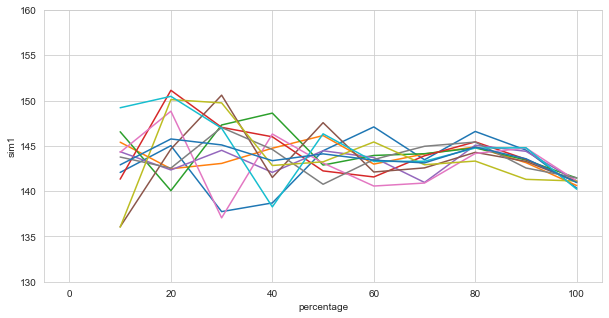

In [189]:
fig, ax = plt.subplots(figsize=(10,5))
for i in df.columns:
    plot = sns.lineplot(x='percentage', y=i, data=df)
    
plot.set_ylim(130,160)

(120.0, 160.0)

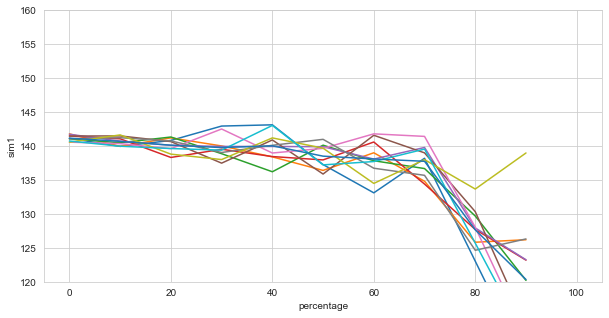

In [192]:
fig, ax = plt.subplots(figsize=(10,5))
for i in ds.columns:
    plot = sns.lineplot(x='percentage', y=i, data=ds)
    
plot.set_ylim(120,160)

In [190]:
ds = pd.DataFrame(d_s)
ds['mean'] = ds.mean(axis=1)
ds['percentage'] = [i for i in np.arange(0,110,10)]
ds

,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10,mean,percentage
100 %,141.108000,141.770000,141.051000,141.461000,141.712000,141.453000,140.549000,141.043000,140.549000,140.720000,141.141600,0
90 %,139.933333,139.930000,140.463333,141.044444,140.707778,141.468889,140.332222,141.204444,141.617778,139.954444,140.665667,10
80 %,140.803750,141.180000,141.308750,138.298750,140.082500,140.636250,139.600000,140.730000,138.786250,139.612500,140.103875,20
70 %,142.920000,139.992857,138.852857,139.508571,139.925714,137.461429,142.487143,139.028571,137.990000,139.375714,139.754286,30
60 %,143.101667,138.385000,136.195000,138.431667,139.913333,140.873333,138.953333,140.090000,141.176667,143.011667,140.013167,40
50 %,137.252000,136.394000,140.104000,137.938000,139.882000,135.860000,139.638000,140.966000,139.664000,137.206000,138.490400,50
40 %,133.092500,138.987500,137.817500,140.572500,138.060000,141.562500,141.772500,136.715000,134.480000,137.697500,138.075750,60
30 %,138.180000,134.800000,136.666667,134.383333,139.766667,138.976667,141.400000,135.670000,137.976667,139.530000,137.735000,70
20 %,123.035000,125.825000,129.680000,127.705000,127.925000,130.320000,128.020000,124.640000,133.650000,125.690000,127.649000,80
10 %,107.850000,126.190000,120.210000,123.190000,123.240000,113.670000,112.070000,126.310000,138.960000,111.650000,120.334000,90


(0.0, 110.0)

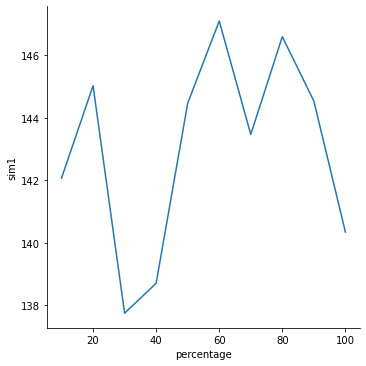

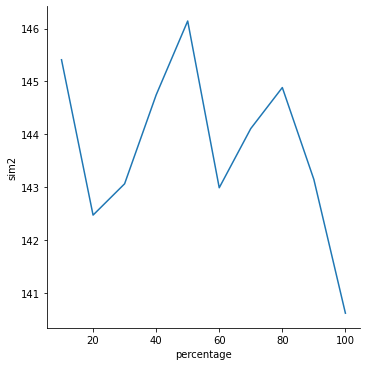

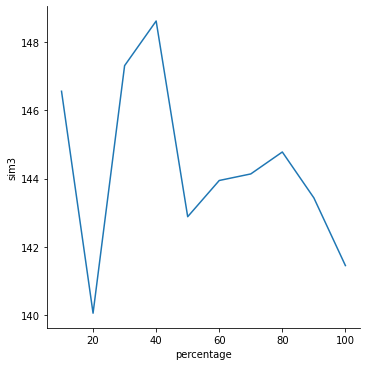

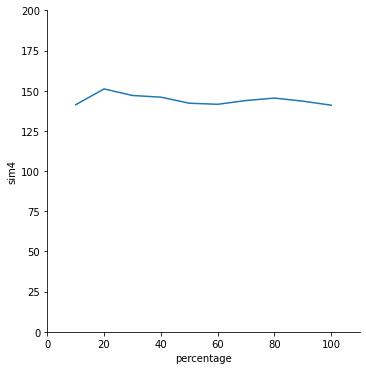

In [127]:
sns.relplot(x='percentage', y="sim1", estimator=None, kind="line", data=df)
sns.relplot(x='percentage', y="sim2", estimator=None, kind="line", data=df)
sns.relplot(x='percentage', y="sim3", estimator=None, kind="line", data=df)
sns.relplot(x='percentage', y="sim4", estimator=None, kind="line", data=df)

plt.ylim(0, 200)
plt.xlim(0, 110)

In [142]:
tips = sns.load_dataset('tips')

In [143]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [145]:
sns.set_style("darkgrid")

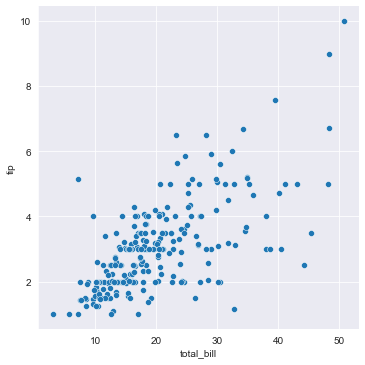

In [146]:
sns.relplot(x='total_bill', y='tip', data=tips)

The sum for drivers employing acceptance function is  pax_id                68277.000000
pickup_t[min]           784.300000
pickup_d[km]            470.580000
travel_t_with[min]     1259.300000
pax_km                  755.580000
travel_t[min]          2180.133333
travel_d[km]           1308.080000
veh_waiting_t[sec]    43049.000000
revenue $              1511.160000
dtype: float64
---------------------------------------------------------
---------------------------------------------------------
The sum for drivers accepting all requests is  pax_id                55820.000000
pickup_t[min]          1151.300000
pickup_d[km]            690.780000
travel_t_with[min]     1048.616667
pax_km                  629.170000
travel_t[min]          2313.866667
travel_d[km]           1388.320000
veh_waiting_t[sec]    43067.000000
revenue $              1258.340000
dtype: float64
